### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [178]:
data = pd.read_csv('data/coupons.csv')

In [180]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [183]:
missing_counts = data.isnull().sum().sort_values()
print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [186]:
Col_fill = ['Bar','RestaurantLessThan20','CarryAway','Restaurant20To50','CoffeeHouse']
data[Col_fill] = data[Col_fill].fillna(value='never')
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [189]:
per_Y_vs_N = data['Y'].value_counts(normalize=True) * 100
per_Y_vs_N

Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64

In [191]:
print(" 56% of the folks who received a coupon accepted it") 

 56% of the folks who received a coupon accepted it


5. Use a bar plot to visualize the `coupon` column.

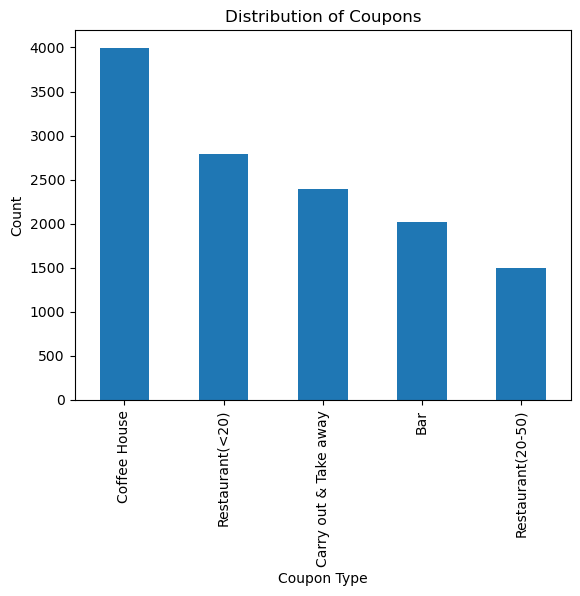

In [194]:
data['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
#plt.show()
plt.savefig('images/Coupon_Distribution.png')




6. Use a histogram to visualize the temperature column.

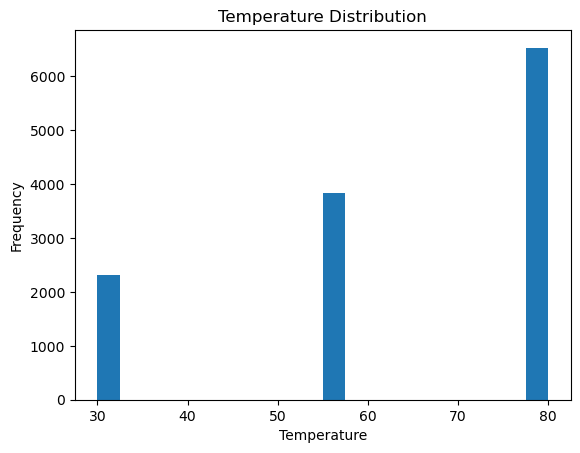

In [197]:
plt.hist(data['temperature'], bins=20)  # bins parameter is optional
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
#plt.show()
plt.savefig('images/Temperature_Distribution.png')


Coupons Accepted 7210


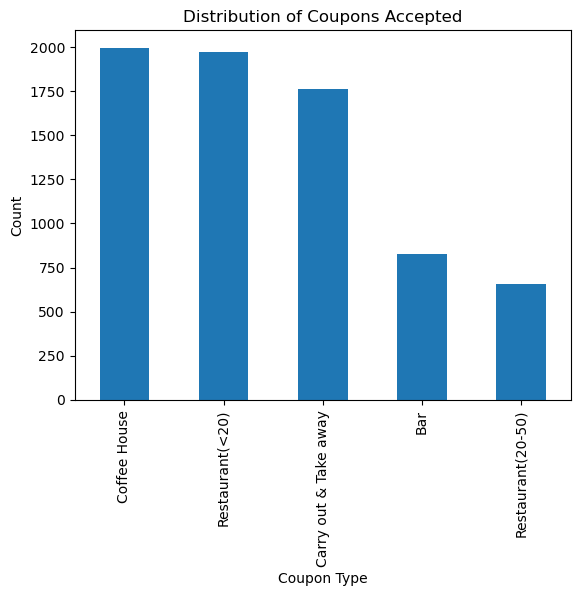

In [199]:
df_Tot_Accepted = data[(data['Y'] == 1)]
print("Coupons Accepted " + str(df_Tot_Accepted.shape[0]))

df_Tot_Accepted['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupons Accepted')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.savefig('images/Coupon_Accepterd_Distribution.png')

#plt.show()
#print("Coffee House is the largest coupon accepeted followed by restuarants < 20")

College drop outs or some degree and bachelors degree are the highest that accepted coupons


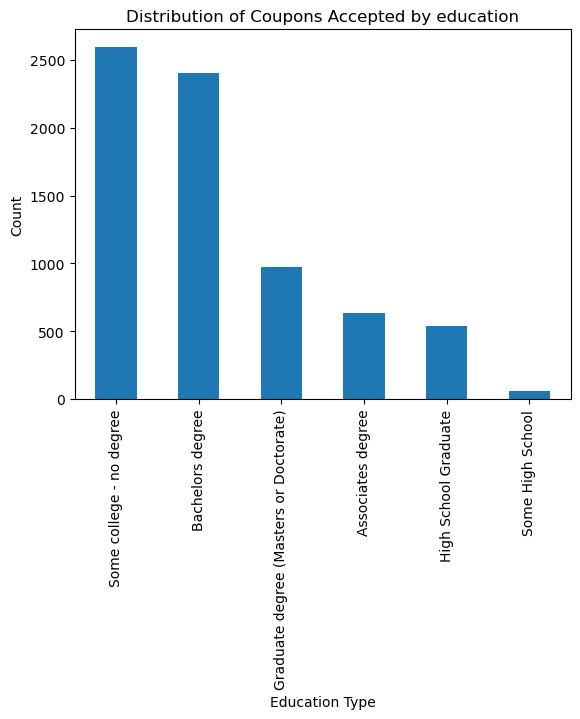

In [201]:
df_Tot_Accepted['education'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupons Accepted by education')
plt.xlabel('Education Type')
plt.ylabel('Count')

plt.savefig('images/Coupon_Accepterd_Distribution.png')

#plt.show()
print("College drop outs or some degree and bachelors degree are the highest that accepted coupons")

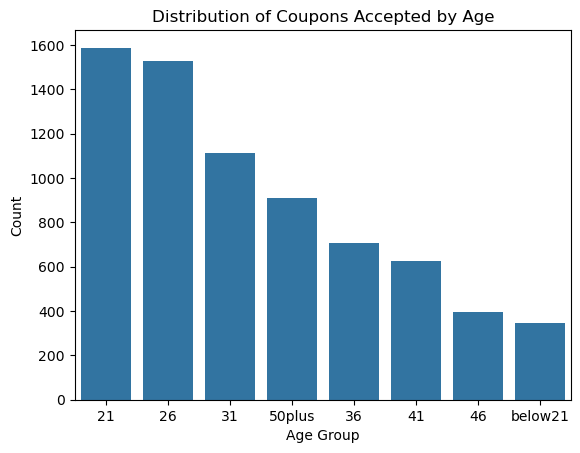

In [203]:
#df_Tot_Accepted['age'].value_counts().plot(kind='bar')
#plt.title('Distribution of Coupons Accepted by age')
#plt.xlabel('age grpup')
#plt.ylabel('Count')
#plt.show()

sns.countplot(data=df_Tot_Accepted, x='age', order=data['age'].value_counts().index)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Coupons Accepted by Age')
plt.savefig('images/Coupon_Accepterd_Age.png')



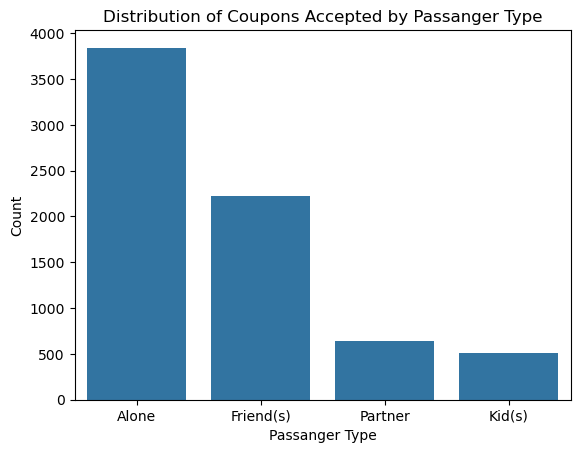

In [205]:
sns.countplot(data=df_Tot_Accepted, x='passanger', order=data['passanger'].value_counts().index)

plt.title('Distribution of Coupons Accepted by Passanger Type')
plt.xlabel('Passanger Type')
plt.ylabel('Count')
plt.savefig('images/Coupon_Accepterd_Passanger.png')



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [208]:
#df_bar = data.loc[data['coupon'].str.contains('Bar')]

df_bar = data[(data['coupon']== 'Bar')]
#df_bar.info()
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [211]:
df_bar_accepted = df_bar['Y'].value_counts(normalize=True) * 100
df_bar_accepted
#len(df_bar_accepted)

#df_bar_accepted_per = df_bar_accepted.loc(df_bar_accepted['Y'] == 1)
#df_bar_accepted_per

Y
0    58.998513
1    41.001487
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [214]:
print("Number that got Bar Coupons = " + str(df_bar.shape[0]))
df_bar_Tot_Accepted = df_bar[(df_bar['Y'] == 1)]


df_bar_less3 = df_bar_Tot_Accepted[(df_bar_Tot_Accepted['Bar'] == '1~3')]
df_bar_more3 = df_bar_Tot_Accepted[(df_bar_Tot_Accepted['Bar'] == '4~8') | (df_bar_Tot_Accepted['Bar'] == 'gt8')]

#df_bar_less3 = df_bar[(df_bar['Bar'] == '1~3') & (df_bar['Y'] == 1)]
#df_bar_more3 = df_bar[(df_bar['Bar'] == '4~8') | (df_bar['Bar'] == 'gt8') & (df_bar['Y'] == 1)]


T_bar_accepted = len(df_bar_Tot_Accepted)
print("Number of Accepted Bar Coupons = " + str(df_bar_Tot_Accepted.shape[0]))


T_les3_accepted =  len(df_bar_less3)
print("Number of Accepted Bar Coupons that visited less then 3 times= " + str(df_bar_less3.shape[0]))


T_more3_accepted = len(df_bar_more3)
print("Number of Accepted Bar Coupons that visited more then 3 times= " + str(df_bar_more3.shape[0]))


ratio_less_3 = T_les3_accepted / T_bar_accepted
print("Ratio of less then 3 times to total accpeted bar coupons= " + str(ratio_less_3 *100))


ratio_more_3 = T_more3_accepted / T_bar_accepted
print("Ratio of less then 3 times to total accpeted bar coupons= " + str(ratio_more_3*100))


Number that got Bar Coupons = 2017
Number of Accepted Bar Coupons = 827
Number of Accepted Bar Coupons that visited less then 3 times= 257
Number of Accepted Bar Coupons that visited more then 3 times= 153
Ratio of less then 3 times to total accpeted bar coupons= 31.076178960096733
Ratio of less then 3 times to total accpeted bar coupons= 18.500604594921402


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [217]:
bar_visit_list = ['1~3', '4~8', 'gt8']
replacements = {'below21': '20', '50plus': '51'}

# Update the age below 21 to 20 and 50Plus to 51 so that you can do proper comparision operations
for old_value, new_value in replacements.items():
    df_bar_Tot_Accepted.loc[df_bar_Tot_Accepted['age'] == old_value, 'age'] = new_value


df_more1_age25 = df_bar_Tot_Accepted[df_bar_Tot_Accepted['Bar'].isin(bar_visit_list) & (df_bar_Tot_Accepted['age'] > '25')]

df_other = df_bar_Tot_Accepted[(~df_bar_Tot_Accepted['Bar'].isin(bar_visit_list)) & (df_bar_Tot_Accepted['age'] < '25')]


print("Ratio of Drivers visiting more than once and older than 25 to total accepted bar coupoons is " + str(len(df_more1_age25)/T_bar_accepted * 100))

print("Others accepted coupon is " + str(len(df_other)/T_bar_accepted * 100))

print("Yes there is a difference berween all drivers older than 25 visitng more than onces vs others") 


Ratio of Drivers visiting more than once and older than 25 to total accepted bar coupoons is 35.30834340991535
Others accepted coupon is 15.598548972188633
Yes there is a difference berween all drivers older than 25 visitng more than onces vs others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [220]:
#df_more1 = df_bar_Tot_Accepted.query('Bar in @bar_visit_list')
#print(len(df_more1))

df_gtr_once_month= df_bar_Tot_Accepted[df_bar_Tot_Accepted['Bar'].isin(bar_visit_list)]

#df_no_kids = df_bar_Tot_Accepted[df_bar_Tot_Accepted['Bar'].isin(bar_visit_list) & (df_bar_Tot_Accepted['passanger'] != "Kid(s)") 
#                & (df_bar_Tot_Accepted['occupation'] != "Farming Fishing & Forestry")]

df_no_kids_nofarm = df_gtr_once_month[(df_gtr_once_month['passanger'] != "Kid(s)") 
                & (df_gtr_once_month['occupation'] != "Farming Fishing & Forestry")]


print(len(df_no_kids_nofarm))
print(len(df_no_kids_nofarm)/T_bar_accepted)

print("Ratio of Drivers visiting more than once with passangers not kids and not in Farming, Fishing and Forestory to total accepted is " + str(len(df_no_kids_nofarm)/T_bar_accepted * 100))


393
0.4752116082224909
Ratio of Drivers visiting more than once with passangers not kids and not in Farming, Fishing and Forestory to total accepted is 47.521160822249094


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [223]:
#df_no_kids_windowed = df_bar_Tot_Accepted[df_bar_Tot_Accepted['Bar'].isin(bar_visit_list) & (df_bar_Tot_Accepted['passanger'] != "Kid(s)") 
#                & (df_bar_Tot_Accepted['maritalStatus'] != "Widowed")]

df_no_kids_windowed = df_gtr_once_month[(df_gtr_once_month['passanger'] != "Kid(s)") 
                & (df_gtr_once_month['maritalStatus'] != "Widowed")]

df_under_30 = df_gtr_once_month[(df_gtr_once_month['age'] < '30')]

rest_gtr_4 = ['4~8', 'gt8']
income_list = ['$25000 - $37499', '$37500 - $49999', 'Less than $12500', '$12500 - $24999']

df_cheap_res_50k = df_gtr_once_month[(df_gtr_once_month['RestaurantLessThan20'].isin(rest_gtr_4)) &  df_gtr_once_month['income'].isin(income_list)]

#print(len("Bar Accepted with No Kids and Windowed" + str(df_no_kids_windowed)))
#print(len(df_no_kids_windowed))

print("Bar Accepted with No Kids and Windowed = " + str(df_no_kids_windowed.shape[0]))
print("Ratio of bar accepted with no kids and widowed to total bar accepted = " + str(len(df_no_kids_windowed)/T_bar_accepted))

print("Bar Accepted with under the age of 30 = " + str(len(df_under_30)))
print("Ratio of bar accepted with under 30 to total bar accepted = " + str(len(df_under_30)/T_bar_accepted))

print("Bar couppn Accepted with cheap restuarant and income < 50k = " + str(len(df_cheap_res_50k)))
print("Ratio of bar accepted with cheap restuarant and income < 50k to total bar accepted  = " + str(len(df_cheap_res_50k)/T_bar_accepted))

total_above_3 = len(df_no_kids_windowed) + len(df_cheap_res_50k) + len(df_under_30)

print("total bar acceped with No_kids_Widowed plus under 30 plus cheap restuarant with less 50k  = " + str(total_above_3))

print("Ratio total bar acceped with No_kids_Widowed plus under 30 plus cheap restuarant with less 50k to total bar accepted  = " + str(total_above_3 / T_bar_accepted ))

# Create a dataframe of all the conditions above by Applying OR in one statement
df_total_OR =  df_gtr_once_month[((df_gtr_once_month['passanger'] != "Kid(s)")
                & (df_gtr_once_month['maritalStatus'] != "Widowed")) | (df_gtr_once_month['age'] < '30') | 
                    ((df_gtr_once_month['RestaurantLessThan20'].isin(rest_gtr_4)) &  df_gtr_once_month['income'].isin(income_list))]
print (len(df_total_OR)) 
print(len(df_total_OR) / T_bar_accepted )


Bar Accepted with No Kids and Windowed = 393
Ratio of bar accepted with no kids and widowed to total bar accepted = 0.4752116082224909
Bar Accepted with under the age of 30 = 249
Ratio of bar accepted with under 30 to total bar accepted = 0.3010882708585248
Bar couppn Accepted with cheap restuarant and income < 50k = 100
Ratio of bar accepted with cheap restuarant and income < 50k to total bar accepted  = 0.12091898428053205
total bar acceped with No_kids_Widowed plus under 30 plus cheap restuarant with less 50k  = 742
Ratio total bar acceped with No_kids_Widowed plus under 30 plus cheap restuarant with less 50k to total bar accepted  = 0.8972188633615478
401
0.4848851269649335


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [226]:
print("My observations is the largest group of drivers that accepted bar coupons do not have kids" ) 

My observations is the largest group of drivers that accepted bar coupons do not have kids


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

total records in data set 12684
total records coupon accepted 7210
The coupon that was most accepted is Coffee House folllowed by Restuarant < 20 then Carrry Out


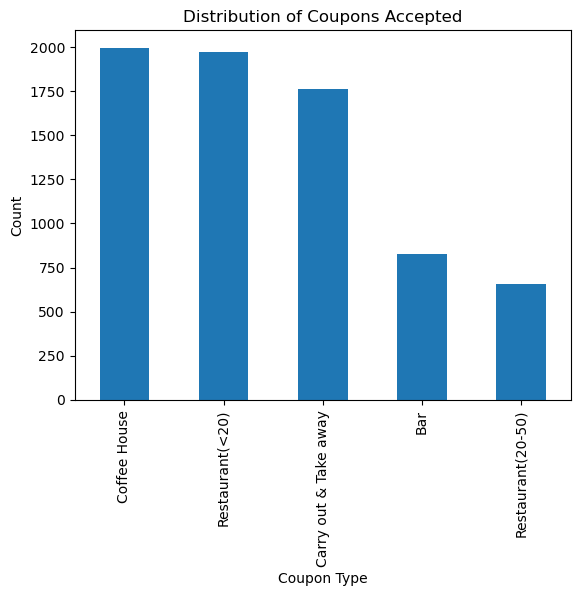

In [229]:
total_records = data.shape[0]
df_coupon_accepted = data[(data['Y']== 1)]
number_coupon_accepted = df_coupon_accepted.shape[0]
print("total records in data set " + str(total_records))
print("total records coupon accepted " + str(number_coupon_accepted))

df_coupon_accepted['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupons Accepted')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.savefig('images/Coupon_Accepterd_by_dist_type.png')


print("The coupon that was most accepted is Coffee House folllowed by Restuarant < 20 then Carrry Out")  

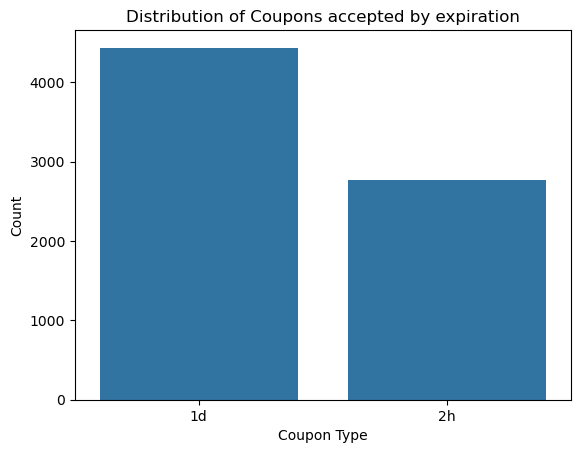

In [231]:
#df_coupon_accepted['expiration'].value_counts().plot(kind='bar')

sns.countplot(data=df_coupon_accepted, x='expiration', order=data['expiration'].value_counts().index)

plt.title('Distribution of Coupons accepted by expiration')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.savefig('images/Coupon_Accepted_Expiration.png')


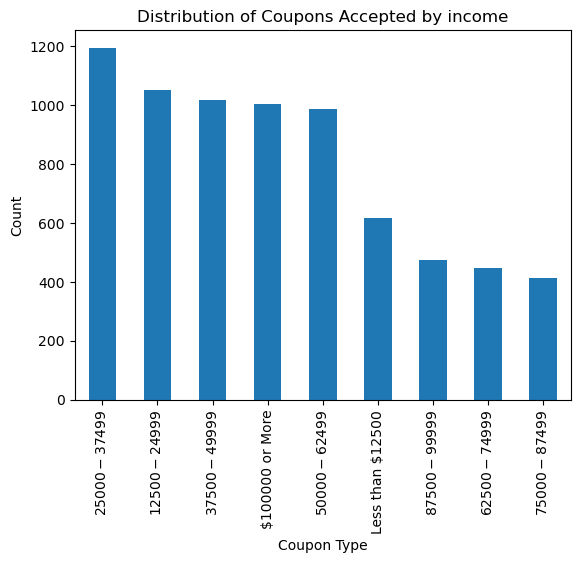

In [263]:
df_coupon_accepted['income'].value_counts().plot(kind='bar')

#income_counts = df_coupon_accepted['income'].value_counts()
#plt.bar(income_counts.index, income_counts.values)
#sns.countplot(data=df_coupon_accepted, x='income', order=data['income'].value_counts().index)

plt.title('Distribution of Coupons Accepted by income')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

plt.savefig('images/Coupon_Accepted_by_Income.png')


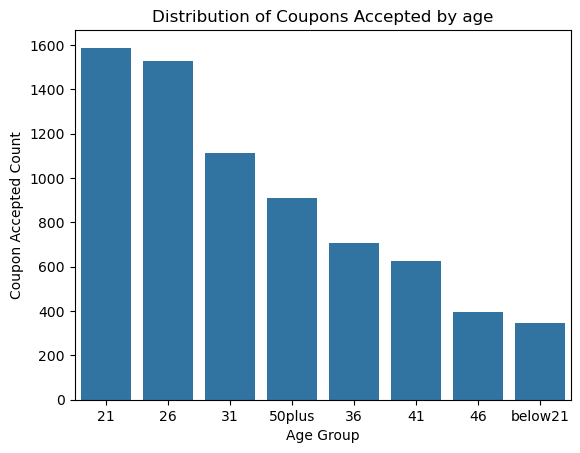

In [255]:
#df_coupon_accepted['age'].value_counts().plot(kind='bar')

sns.countplot(data=df_coupon_accepted, x='age', order=data['age'].value_counts().index)

#print("Most coupons were accepted in the age group of 21, 26 and 31" )

plt.title('Distribution of Coupons Accepted by age')
plt.xlabel('Age Group')
plt.ylabel('Coupon Accepted Count')

plt.savefig('images/Coupon_Accepterd_Age.png')


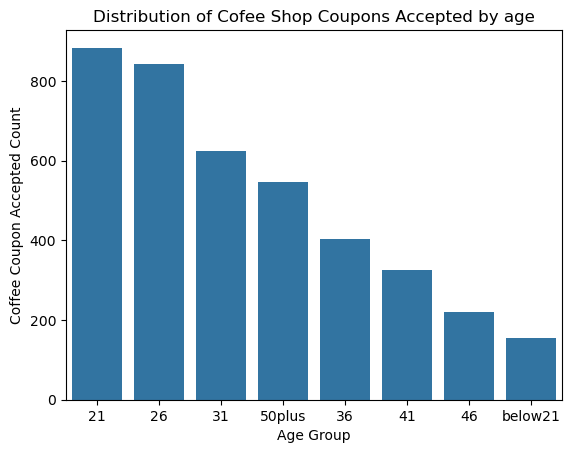

In [257]:
#Create a dataframe for all coffee bar coupons
df_coffee = data[(data['coupon']== 'Coffee House')]

#df_coffee['age'].value_counts().plot(kind='bar')
sns.countplot(data=df_coffee, x='age', order=data['age'].value_counts().index)
plt.title('Distribution of Cofee Shop Coupons Accepted by age')
plt.xlabel('Age Group')
plt.ylabel('Coffee Coupon Accepted Count')
plt.savefig('images/Coffe_Coupon_Accepted_Distribution.png')


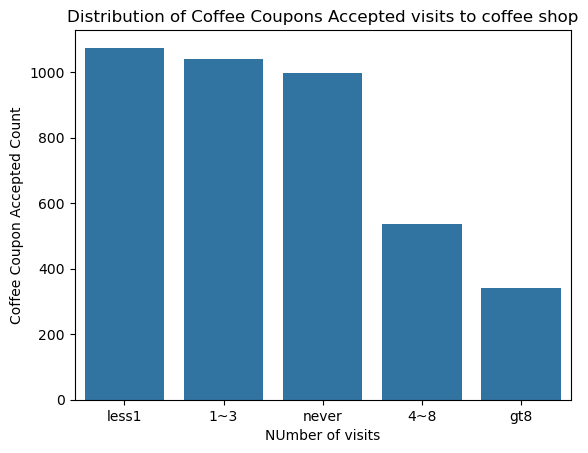

<Figure size 640x480 with 0 Axes>

In [259]:
#df_coffee['CoffeeHouse'].value_counts().plot(kind='bar')

sns.countplot(data=df_coffee, x='CoffeeHouse', order=data['CoffeeHouse'].value_counts().index)

plt.title('Distribution of Coffee Coupons Accepted visits to coffee shop')
plt.xlabel('NUmber of visits')
plt.ylabel('Coffee Coupon Accepted Count')
plt.show()
plt.savefig('images/Coffe_Coupon_Accepted_by_visits.png')


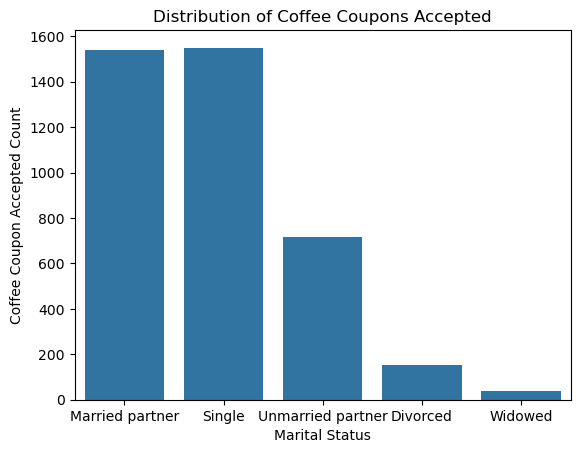

In [241]:
sns.countplot(data=df_coffee, x='maritalStatus', order=data['maritalStatus'].value_counts().index)

plt.title('Distribution of Coffee Coupons Accepted')
plt.xlabel('Marital Status')
plt.ylabel('Coffee Coupon Accepted Count')
plt.savefig('images/Coffe_Coupon_Accepted_by_Marital.png')



In [243]:
#print("From the above investigation and observations:  most people who accepeted coffee shop coupons had visited coffes shop less than once and are single or married")

From the above investigation and observations:  most people who accepeted coffee shop coupons had visited coffes shop less than once and are single or married


total records in data set 12684
total records coupon Decline 5474


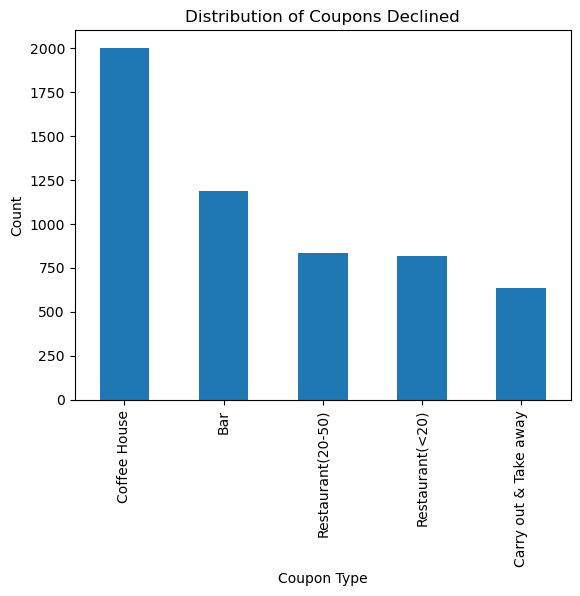

In [245]:
df_coupon_declined = data[(data['Y']== 0)]
print("total records in data set " + str(total_records))
print("total records coupon Decline " + str(df_coupon_declined.shape[0]))


df_coupon_declined['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupons Declined')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.savefig('images/Distribution_Coupons_Declined.png')


In [247]:
print("Interestingly the coupon that was highest declined is Coffee House and second heighest is Bar")

Interestingly the coupon that was highest declined is Coffee House and second heighest is Bar


In [249]:
df_bar_declined = df_coupon_declined[(df_coupon_declined['coupon']== 'Bar')]

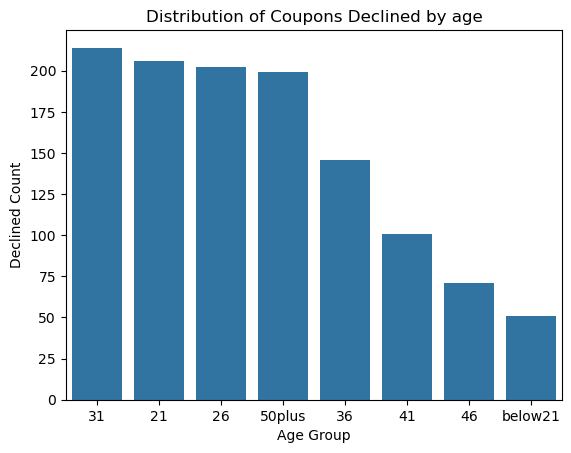

In [251]:

sns.countplot(data=df_bar_declined, x='age', order=df_bar_declined['age'].value_counts().index)
# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Declined Count')
plt.title('Distribution of Coupons Declined by age')
plt.savefig('images/Distribution_Coupons_Declined_Age.png')

#print("Interesting point - folks who declined bar coupons are evenly distributed across most age groups" )
